# Проблема переобучения: регуляризация

## Обзор проблемы

***Переобучение (overfitting)*** в машинном обучении напрямую связано с основной целью моделей — способностью к обобщению, то есть возможностью делать точные предсказания на новых данных. Когда модель переобучается, она слишком точно подстраивается под обучающие данные, включая шум и случайные закономерности, что снижает ее способность корректно работать с новыми данными.

Смоделируем переобучение на простых одномерных данных. Возьмём функцию $y=sin(x)$, добавим "шум" (случайную ошибку, имеющую нормальное распределение со средним 0) и будем подбирать при помощи модели полинома (многочлена) аналитическую зависимость.

In [1]:
import numpy as np
x=np.arange(1,10, 0.2)
y = np.sin(x) + np.random.normal(0, 0.1, 45)  # Добавляем шум

Построим точечную диаграмму.

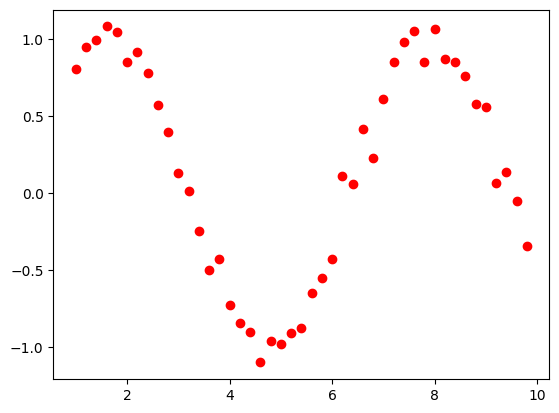

In [2]:
import matplotlib.pyplot as plt
plt.plot(x,y,'o', color='red');

Будем подбирать полиномы разной степени для предсказания поведения данных. Возьмём в качестве контрастных значения степеней полинома 2, 3 и 14.

Уравнение полинома:
P(x) = 0.0652x^2 + -0.7082x + 1.6612
Уравнение полинома:
P(x) = -0.0281x^3 + 0.5202x^2 + -2.8241x + 4.2429
Уравнение полинома:
P(x) = -0.0000x^14 + 0.0000x^13 + -0.0001x^12 + 0.0026x^11 + -0.0359x^10 + 0.3500x^9 + -2.4865x^8 + 13.0483x^7 + -50.6590x^6 + 144.2411x^5 + -295.1779x^4 + 419.0541x^3 + -389.0097x^2 + 211.4916x + -50.0174


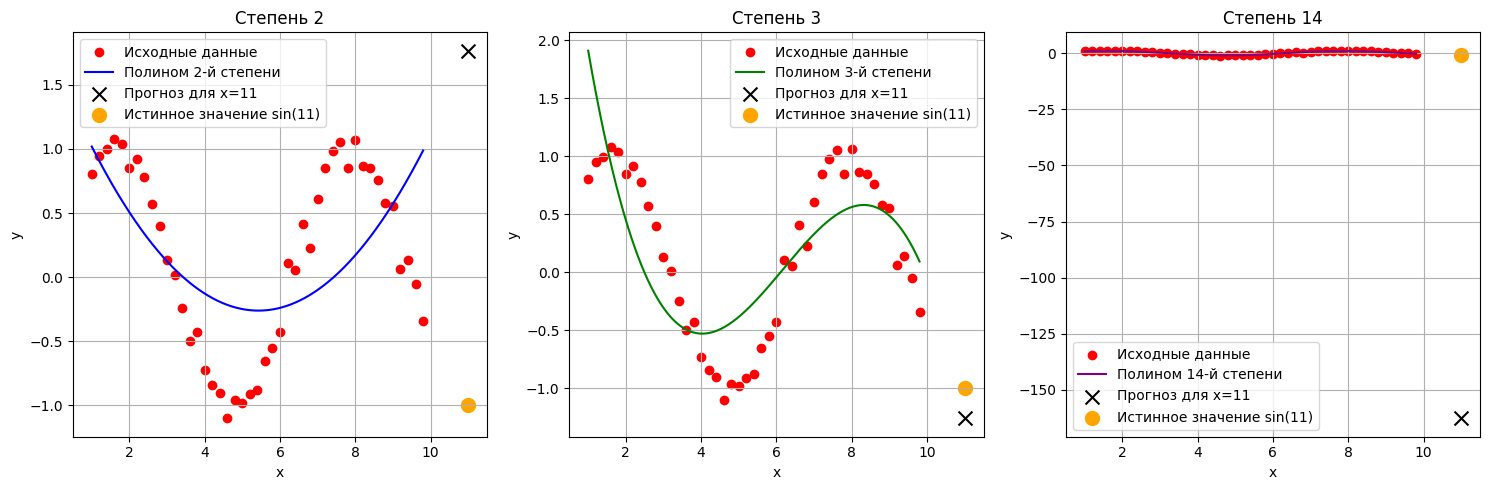

In [3]:
def print_polynomial(coefficients):
    terms = []
    for power, coef in enumerate(coefficients[::-1]):
        if power == 0:
            term = f"{coef:.4f}"
        elif power == 1:
            term = f"{coef:.4f}x"
        else:
            term = f"{coef:.4f}x^{power}"
        terms.append(term)
    polynomial = " + ".join(terms[::-1])
    print("Уравнение полинома:")
    print(f"P(x) = {polynomial}")
    
# Создание сетки для гладких графиков
x_smooth = np.linspace(x.min(), x.max(), 500)

# Настройка графиков
plt.figure(figsize=(15, 5))
colors = ['blue', 'green', 'purple']
degrees = [2, 3, 14]

# Истинное значение синуса для x = 11
x_new = 11
y_true = np.sin(x_new)

for i, (degree, color) in enumerate(zip(degrees, colors), 1):
    # Аппроксимация полиномом
    coefficients = np.polyfit(x, y, degree)
    
    # Вывод коэффициентов полинома
    #print(f"Коэффициенты полинома {degree}-й степени:")
    #print(coefficients)
    print_polynomial(coefficients)
    
    y_fit = np.polyval(coefficients, x_smooth)
    
    # Построение графика
    plt.subplot(1, 3, i)
    plt.scatter(x, y, color='red', label='Исходные данные')
    plt.plot(x_smooth, y_fit, color=color, 
            label=f'Полином {degree}-й степени')
    
    # Прогноз для точки x = 11
    y_new = np.polyval(coefficients, x_new)
    plt.scatter(x_new, y_new, color='black', marker='x', s=100, 
                label=f'Прогноз для x={x_new}')
    
    # Истинное значение синуса для x = 11
    plt.scatter(x_new, y_true, color='orange', marker='o', s=100, 
                label=f'Истинное значение sin({x_new})')
    
    plt.title(f'Степень {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

На графике слева зависимость моделируется при помощи полинома 2-й степени, то есть при помощи квадратичной функции. Видно, что кривая плохо улавливает закономерность данных. Кроме того, на новых данных (значение $x=11$) предсказание тоже неудовлетворительной. То есть модель плохого качества и на обучающей выборке и на тестовой выборке. Это ***недообучение (underfitting)***.

На графике справа модель почти идеально повторяет поведение точек обучающей выборки, но при этом для новых данных (значение $x=11$) ошибка прогноза очень велика. То есть модель имеет крайне высокой значение метрики качества на обучающей выборке, но при этом крайне низкое значение метрики качества на тестовой выборке. Это ***переобучение (overfitting)*** модели.

На графике в центре кривая хорошо моделирует поведение данных обучающей выборки и имеет хорошее значение метрики качества на новых данных. Это оптимальная модель.

Можно подобрать полином, который без ошибок будет прогнозировать поведение данных на обучающей выборке:

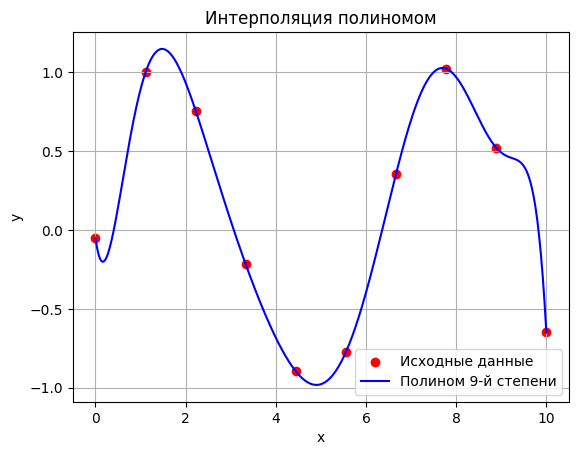

Коэффициенты полинома:
[-2.08224617e-05  9.21090211e-04 -1.70488394e-02  1.71810700e-01
 -1.02779490e+00  3.71690503e+00 -7.76758796e+00  7.88802017e+00
 -2.02398219e+00 -5.01705074e-02]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
x = np.linspace(0, 10, 10)
y = np.sin(x) + np.random.normal(0, 0.1, 10)  # Добавляем шум

# Степень полинома
degree = 9  # Высокая степень для демонстрации переобучения

# Аппроксимация полиномом
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)

# Генерация гладкой сетки для построения графика
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = polynomial(x_smooth)

# Построение графика
plt.scatter(x, y, color='red', label='Исходные данные')
plt.plot(x_smooth, y_smooth, color='blue', label=f'Полином {degree}-й степени')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.title('Интерполяция полиномом')
plt.show()

# Вывод коэффициентов полинома
print("Коэффициенты полинома:")
print(coefficients)

Но обобщающая способность, т.е. способнеость строить хорошие прогнозы на новых данных, у него будет крайне низкая.

***Аналогия с медицинской диагностикой***

Представьте, что вы пытаетесь предсказать риск развития диабета у пациента на основе анализов крови.

* Без регуляризации: Модель может "зациклиться" на незначительных колебаниях в данных (например, временное повышение глюкозы из-за стресса) и придать им слишком большой вес. Это как врач, который ставит диагноз только по одному симптому, игнорируя общую картину.

* С регуляризацией: Модель учится учитывать основные закономерности, не переоценивая случайные отклонения. Это похоже на врача, который анализирует все показатели комплексно и не делает поспешных выводов.

Если признаков слишком много или данные зашумлены, модель становится "перестраховщиком" — она идеально подстраивается под тренировочные данные, но ошибается на новых пациентах.

Таким образом, излишняя сложность модели (которая харктеризуется большим числом параметром) плохо справляется с поиском общим закономерностей в данных и часто подстраивается под "шум".

**Причины переобучения**

* Слишком сложная модель с большим количеством параметров.
* Недостаточный объем или качество обучающих данных.

**Признаки переобучения**

* Высокая точность на обучающих данных и низкая на тестовых.

**Методы борьбы с переобучением**
* Упрощение модели (уменьшение числа параметров).
* Регуляризация (например, L1/L2).
* Увеличение объема данных.
* Использование методов кросс-валидации.


В настоящем практическом занятии расмотрим регуляризацию как метод борьбы с переобучением модели.

## Регуляризация линейной регрессии

Библиотека Scikit-learn включает в себя несколько стандартных наборов данных, одним из которых являются данные о диабете. В нём содержится информацию о 442 пациентах. Для каждого из них указаны десять исходных характеристик: возраст, пол, индекс массы тела, среднее кровяное давление, а также шесть измерений сыворотки крови (s1, s2, s3, s4, s5 и s6). Также имеется интересующая нас целевая переменная — количественная оценка прогрессирования заболевания (y) через год после первоначального обследования.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sklearn

Загрузим данные.

In [6]:
from sklearn import datasets
X, y = datasets.load_diabetes(as_frame=True, return_X_y=True)
display(X.head())
display(y.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Разделим данные на обучающую и тестовую выборки, произвеёем масштабирование признаков.

In [7]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)
 
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Построим обычную модель линейной регрессии.

In [8]:
from sklearn.linear_model import LinearRegression
 
ols = LinearRegression()
ols.fit(X_train, y_train)
 
y_pred_train = ols.predict(X_train)
y_pred_test = ols.predict(X_test)
 
from sklearn.metrics import mean_squared_error
 
print('train: ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('test: ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

train: 54.07440872452782
test: 53.12003915269996


### $L_1$ и $L_2$-регуляризация

Слишком сложные регрессионные модели, приводящие к переобучению характеризуются большим количеством параметров и/или большими по абсолютному значению коэффициентами регрессии. Идея регуляризации состоит в том, чтобы штрафовать модель во время обучения за большие значения весов. Таким образом, к стандартной среднеквадратической ошибке модели добавляется компонент, штрафующий модель за излишнюю сложность. 

Существуют 2 основных подхода для назначения функции штрафов (англ., penalty):
* $L_2$-регуляризация или ридж-регрессия (ridge regression, гребневая регрессия);
* $L_1$-регуляризация или лассо-регрессия (lasso regression).

Штрафы в ридж-регрессии представляет собой сумму коэффициентов регрессии $\theta_i$, возведенных в квадрат или $L_2$-норму:
$$L_{Ridge}(\theta) = MSE + \alpha \cdot \sum{\theta_i^2}.$$

Лассо-регрессия для регуляризации использует сумму весов по модулю, то есть $L_1$-норму:
$$L_{Lasso}(\theta) = MSE + \alpha \cdot \sum{\lvert \theta_i \rvert}.$$

В обоих формула $\alpha$ - коэффициент регуляризации (чем больше $\alpha$, тем сильнее штраф за большие значения коэффициентов).

В силу математических особенностей функции модуля, при $L_1$-регуляризации некоторые веса модуля могут обнулится, что будет означать исключения некоторых признаков из модели. Подобного не происходит с $L_2$-регуляризацией.

Рассмотрим таблицу сравнительных характеристик двух типов регуляризации:


Сравнение| $L_1$-регуляризация | $L_2$-регуляризация |
|:--------:|:--------:|:--------:|
| Отбор признаков |Не выполняет отбор признаков. Все признаки остаются в модели, но их влияние уменьшается. |Может обнулить коэффициенты для незначимых признаков, что упрощает модель. | 
| Подход к мультиколлинеарности | Эффективно справляется с мультиколлинеарностью, уменьшая влияние коррелированных признаков, но не исключая их. | Может исключить один из коррелированных признаков, что иногда приводит к потере информации. | 
| Применение | Подходит, когда все признаки потенциально важны, например, в медицинских исследованиях. | Эффективен, когда число признаков велико, и необходимо выделить наиболее значимые. | 


Для использования обозначенных выше методов регуляризации в библиотеке `sklearn` есть классы `Ridge` и `Lasso`. Построим для данных по диабету модели с регуляризацией и сравним их.

In [9]:
from sklearn.linear_model import Ridge
 
ridge = Ridge(alpha = 10)
 
ridge.fit(X_train, y_train)
 
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

print('train: ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('test: ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

train: 54.25114181231783
test: 53.079964744027016


In [10]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.2, tol = 0.0001)
lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

print('train: ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('test: ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

train: 54.14514848276575
test: 53.04876983430864


Построим коэффициенты регрессии для 3-х моделей: без регуляризации, ридж и лассо.

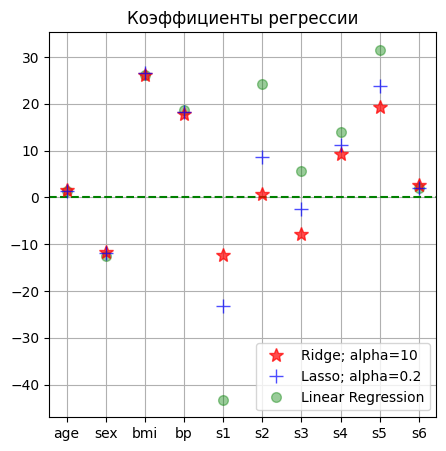

In [11]:
features = X.columns
 
plt.figure(figsize = (5, 5))
plt.plot(features, ridge.coef_, alpha=0.7, linestyle='none' , marker='*', markersize=10, color='red', label=r'Ridge; alpha=10', zorder = 7)
plt.plot(features, lasso.coef_, alpha=0.7, linestyle='none' , marker='+', markersize=10, color='blue', label=r'Lasso; alpha=0.2', zorder = 7)
plt.plot(features, ols.coef_, alpha=0.4, linestyle='none', marker='o', markersize=7, color='green',label='Linear Regression')
plt.axhline(y=0, color='g', linestyle='--')
plt.title('Коэффициенты регрессии')
plt.xticks(rotation = 0)
plt.legend()
plt.grid(True)
plt.show()

На графике видно, что значения коэффициентов в моделях с регуляризацей стали меньше по абсолютной величине. Причем для ридж-регрессии коэффициенты уменьшились больше, чем для лассо. Подумайте, почему?

### Elastic Net

Можно комбинировать оба подхода для регуляризации, использовав Elastic Net:
$$L_{ElasticNet} = MSE + \alpha \cdot L1_{ratio} \cdot \sum{\lvert \theta_i \rvert} + 0.5 \cdot \alpha \cdot (1-L1_{ratio}) \cdot \sum{\theta_i^2},$$
где 
- $\alpha$: общий коэффициент регуляризации (чем больше $\alpha$, тем сильнее штраф за большие значения коэффициентов);
- $L1_{ratio}$: определяет соотношение между L1- и L2-регуляризацией:
    * если $L1_{ratio}=1$, модель становится лассо;
    * если  $L1_{ratio}=0$, модель становится ридж;
    * если  $0<L1_{ratio}<1$, модель является ElasticNet.

Метод реализован в классе `ElasticNet` библиотеки `sklearn`.

In [12]:
from sklearn.linear_model import ElasticNet
 
elastic = ElasticNet(alpha = 0.05, l1_ratio=0.5)
elastic.fit(X_train, y_train)
 
elastic.fit(X_train, y_train)
 
y_pred_train = elastic.predict(X_train)
y_pred_test = elastic.predict(X_test)
print('train: ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print('test: ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test))))

train: 54.23377382584148
test: 53.08361413545624


Сравним результаты моделей на обучающей и тестовой выборке по метрике качества `RMSE`.

| Выборка | Регрессия без регуляризации | Ридж-регрессия |Лассо-регрессия | Elastic Net |
|:--------:|:--------:|:--------:|:--------:|:--------:|
| Обучающая | 54.07 | 54.25 | 54.15 | 54.23 |
| Тестовая | 53.12 | 53.08 | 53.05 | 53.08 |

Как и ожидалось, лучшие результаты на обучающей выборке оказались в модели без регуляризации. При этом на тестовой выборке результат у этой модели хуже. Модели с регуляризацей оказались лучше на тестовой выборке.

## Регуляризация логистической регрессии

В модели логистической регрессии релаляризация задается в виде параметра `penalty` для класса `LogisticRegression()`.

Методы регуляризации те же, что и для регрессионной модели:

- penalty = 'l1' — лассо-регуляризация;
- penalty = 'l2' — ридж-регуляризация, это значение по умолчанию (всё это время вы регуляризовывали логистическую регрессию);
- penalty = 'elasticnet' — комбинация обеих типов регуляризации; 
- penalty='none' — не использовать регуляризацию.

Если вы выберете опцию 'l1' или 'elasticnet', то должны поменять ещё одну настройку — solver='saga'. Она меняет поиск решения в модели: из-за L1-регуляризации алгоритмы логистической регрессии не могут вычислять производные, поэтому поиск решения происходит несколько сложнее.

В `sklearn` нужно уменьшить `C`, чтобы усилить регуляризацию, потому что `С` обратно пропорциональна $\alpha$ — коэффициенту, определяющему силу регуляризации $C = \frac{1}{\alpha}$.

Опция `elasticnet` подтягивает за собой дополнительную настройку `l1_ratio`. Её значение изменяется от нуля до единицы: 
- 1 — использовать только l1;
- 0 — использовать только l2;
- промежуточное значение — комбинировать обе регуляризации (чем выше значение l1_ratio, тем больший вклад внесёт лассо-регуляризация).

Регуляризацию модели для классификации рассмотрим на данных по диабету (файл `diabetes.csv`).

In [13]:
data = pd.read_csv('diabetes.csv')

In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


Разделим данные на обучающую и тестовую выборки.

In [15]:
RANDOM_STATE = 77

X = data.drop(columns=['Outcome'])
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE) 

Построим модель без регуляризации. В качестве метрики качества выберем `Accuracy`.

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# стандартизируем выборки
scaler = StandardScaler()
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

# обучаем модель логистической регрессии, получаем предсказания на тестовой выборке
# считаем accuracy
clf = LogisticRegression(penalty='none')
clf = clf.fit(X_train_scalled, y_train)
y_pred = clf.predict(X_test_scalled)
r = accuracy_score(y_test, y_pred)
print(f'Accuracy модели без регуляризации на тестовой выборке равна {r: .2%}')

Accuracy модели без регуляризации на тестовой выборке равна  73.96%


Построим модели с разными методами регуляризации.

In [17]:
clf_lasso = LogisticRegression(penalty = 'l1', C=0.01, solver='saga')
clf_lasso.fit(X_train_scalled, y_train)
y_pred = clf_lasso.predict(X_test_scalled)
r = accuracy_score(y_test, y_pred)
print(f'Accuracy модели с L1-регуляризацией на тестовой выборке равна {r: .2%}')

Accuracy модели с L1-регуляризацией на тестовой выборке равна  71.35%


In [18]:
clf_ridge = LogisticRegression(penalty = 'l2', C=0.01)
clf_ridge.fit(X_train_scalled, y_train)
y_pred = clf_ridge.predict(X_test_scalled)
r = accuracy_score(y_test, y_pred)
print(f'Accuracy модели с L2-регуляризацией на тестовой выборке равна {r: .2%}')

Accuracy модели с L2-регуляризацией на тестовой выборке равна  76.56%


In [19]:
clf_elasticnet = LogisticRegression(penalty='elasticnet', l1_ratio=0.2, C=0.01, solver='saga')
clf_elasticnet = clf_elasticnet.fit(X_train_scalled, y_train)
y_pred = clf_elasticnet.predict(X_test_scalled)
r = accuracy_score(y_test, y_pred)
print(f'Accuracy модели с ElasticNet-регуляризацией на тестовой выборке равна {r: .2%}')

Accuracy модели с ElasticNet-регуляризацией на тестовой выборке равна  75.52%


Лучшей окказалась модель с $L_2$-регуляризацией.

Посмотрим на коэффициенты логистической регресси для ридж- и лассо-регуляризации:

In [20]:
clf_lasso.coef_

array([[0.        , 0.38033684, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [21]:
clf_ridge.coef_

array([[0.15775239, 0.49540401, 0.10966755, 0.15680791, 0.36422304,
        0.22621604, 0.18644579, 0.1583468 ]])

При лассо-регуляризации все признаки, кроме признака `Glucose` оказались исключены из анализа (у них коэффициенты равны 0). За счет этого модель проиграла в качестве на тестовой выборке.

***Зачетное задание по теме***

Во втором практическом занятии 3-го модуля в качестве зачетного задания по теме была предложена задача бинарной  классификации определения доброкачественности (`benign`) или злокачественности (`malignant`) опухоли груди на основе данных, полученных из изображений, созданных при помощи тонкоигольной аспирационной биопсии (FNA) опухоли груди (файл `BreastCanser.csv`).

Построить модели классификации опухолей с разыми методами регуляризации:
- без регуляризации;
- с ридж-регуляризацией;
- с лассо-регуляризацией.

Сравните полученные модели по метрикам качества `Accuracy`, `Precision` и `Recall`.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Загрузка датасета
data = load_breast_cancer()
X, y = data.data, data.target

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Модель без регуляризации
model_no_reg = LogisticRegression(penalty=None, max_iter=1000)
model_no_reg.fit(X_train_scaled, y_train)

# Ridge-регуляризация (L2)
model_ridge = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model_ridge.fit(X_train_scaled, y_train)

# Lasso-регуляризация (L1)
model_lasso = LogisticRegression(penalty='l1', C=0.1, solver='saga', max_iter=1000)
model_lasso.fit(X_train_scaled, y_train)


LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')

In [7]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    }

results = {
    "Без регуляризации": evaluate_model(model_no_reg, X_test_scaled, y_test),
    "Ridge (L2)": evaluate_model(model_ridge, X_test_scaled, y_test),
    "Lasso (L1)": evaluate_model(model_lasso, X_test_scaled, y_test)
}

import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

                   Accuracy  Precision    Recall
Без регуляризации  0.938596   0.984848  0.915493
Ridge (L2)         0.973684   0.972222  0.985915
Lasso (L1)         0.964912   0.958904  0.985915


<Figure size 1200x600 with 0 Axes>

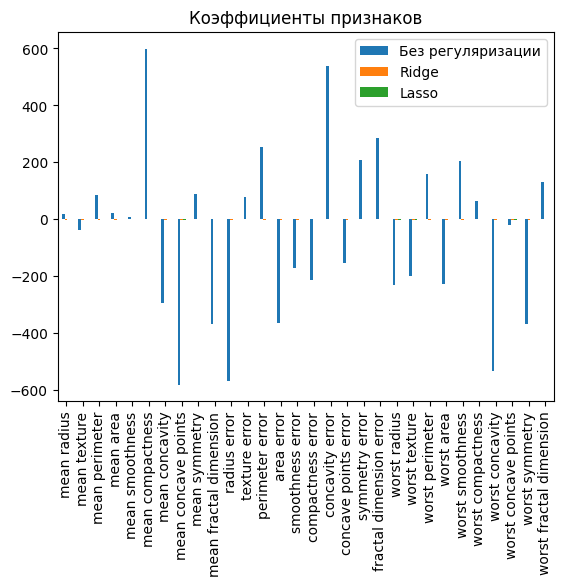

In [8]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame({
    "Без регуляризации": model_no_reg.coef_[0],
    "Ridge": model_ridge.coef_[0],
    "Lasso": model_lasso.coef_[0]
}, index=data.feature_names)

plt.figure(figsize=(12, 6))
coefs.plot(kind='bar', title='Коэффициенты признаков')
plt.xticks(rotation=90)
plt.show()
